In [48]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [49]:
## url das bases de dados
url_adult_train = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_adult_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [50]:
## lendo os dados em python
adult_train = pd.read_csv(url_adult_train, sep=',',header=None)
adult_test = pd.read_csv(url_adult_test, sep=',',skiprows=1,header=None)

In [51]:
## checando as primeiras linhas dos dataframes
adult_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
adult_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [53]:
## dados estão sem cabeçalho, temos que colocar as colunas nos dataframes
columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss',
           'hours_per_week','country','income_higher_than_50k']

adult_train.columns = columns
adult_test.columns = columns


In [54]:
adult_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income_higher_than_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [55]:
## Checando valores nulos 
colunas_categoricas = adult_train.select_dtypes('object').columns.tolist()
print(len(colunas_categoricas))

9


É percebido que em várias colunas há registros como "?" que podemos transforma-lo em nulo, isso deve ser percebido também no adult_test dataset


In [56]:
# retirando os valores ?
adult_train = adult_train.replace(' ?', np.NaN, inplace=False)
adult_test = adult_test.replace(' ?', np.NaN, inplace=False)

In [57]:
## calcular proporção de nulos
total = len(adult_train)
for columns in colunas_categoricas:
     nulos = adult_train[columns].isna().sum()
     proporcao = round(nulos/total,2) * 100
     print("o percentual de nulos da coluna", columns, "é de ", str(proporcao),'%')

o percentual de nulos da coluna workclass é de  6.0 %
o percentual de nulos da coluna education é de  0.0 %
o percentual de nulos da coluna marital_status é de  0.0 %
o percentual de nulos da coluna occupation é de  6.0 %
o percentual de nulos da coluna relationship é de  0.0 %
o percentual de nulos da coluna race é de  0.0 %
o percentual de nulos da coluna sex é de  0.0 %
o percentual de nulos da coluna country é de  2.0 %
o percentual de nulos da coluna income_higher_than_50k é de  0.0 %


Como o percentual de nulos é de 6%, podemos deixa-los na base de treino sem problemas..

In [58]:
## Conforme documentação do próprio site, a coluna fnlwgt não tem função descrição nenhuma.
## coluna education assim como a coluna education-num representam a mesma informação, vamos trabalhar com a coluna education-num e retirar a education
adult_train = adult_train.drop(['fnlwgt', 'education'], axis = 1)
adult_test = adult_test.drop(['fnlwgt', 'education'], axis = 1)

In [59]:
### Preprocessamento dos dados
### Primeiro importante encodar os valroes da varíaveis categoricas
### para o KNN é importante realizar o standard scaler
from sklearn.preprocessing import LabelEncoder
colunas_categoricas = adult_train.select_dtypes('object').columns.tolist()

knn_adult_train = adult_train.copy()
knn_adult_test = adult_test.copy()

# processando as colunas categoricas com o label encoder
for column in colunas_categoricas:
    knn_adult_train[column] = LabelEncoder().fit_transform(knn_adult_train[column])
    knn_adult_test[column] = LabelEncoder().fit_transform(knn_adult_test[column])


In [60]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [61]:
## determinando o valor de y que o se a pessoal tem um income > que 50k
## retirando o valor de y da base de treino
y = knn_adult_train['income_higher_than_50k']
knn_adult_train.drop(['income_higher_than_50k'], axis = 1, inplace = True)


## agora iremos alocar 30% do dados de treino para o houldout e 70% do dados de treino para base de treino
X_train, X_holdout, y_train, y_holdout = train_test_split(
    knn_adult_train, y, test_size=0.3, random_state=17
)

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

## para o knn precisamos de feature scaler devido ao calculo da distancias 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [63]:
from sklearn.metrics import accuracy_score
knn_pred = knn.predict(X_holdout_scaled)
acuracia_knn = round(accuracy_score(y_holdout, knn_pred),2) * 100
print("A acuracia do modelo knn desbalanceado é ", acuracia_knn, '%')

A acuracia do modelo knn desbalanceado é  83.0 %


In [64]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print('Acuracia Treino Holdout:', accuracy_score(knn_pred, y_holdout))
print('Precisão Treino Holdout:', precision_score(knn_pred, y_holdout))
print('Revocacao Treino Holdout:', recall_score(knn_pred, y_holdout))
print('f1_score Treino Holdout:', f1_score(knn_pred, y_holdout))

Acuracia Treino Holdout: 0.8315078308936431
Precisão Treino Holdout: 0.6
Revocacao Treino Holdout: 0.6729500471253534
f1_score Treino Holdout: 0.6343847179031542


In [65]:
## gridsearch para procurar os melhores paramêtros
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 9}, 0.8377061184349008)

In [66]:
## com o parâmetro de cross validation
knn = KNeighborsClassifier(n_neighbors=9)

X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [67]:
knn_pred = knn.predict(X_holdout_scaled)
acuracia_knn = round(accuracy_score(y_holdout, knn_pred),2) * 100
print("A acuracia do modelo knn é após cross validation ", acuracia_knn, '%')

A acuracia do modelo knn é após cross validation  84.0 %


In [68]:
y_pred = knn.predict(X_holdout)

c:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [69]:
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de holdout:\n")
print(confusion_matrix(y_holdout, y_pred))

print("\nMatriz de confusão do modelo nos dados de holdout:\n")
print(classification_report(y_holdout, y_pred))

Matriz de confusão do modelo nos dados de holdout:

[[7047  342]
 [1870  510]]

Matriz de confusão do modelo nos dados de holdout:

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      7389
           1       0.60      0.21      0.32      2380

    accuracy                           0.77      9769
   macro avg       0.69      0.58      0.59      9769
weighted avg       0.74      0.77      0.73      9769



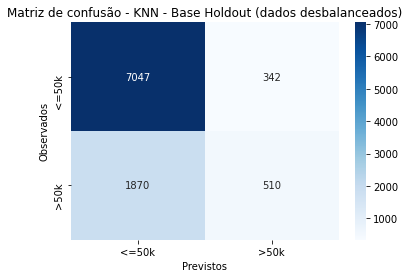

In [70]:
cf_matrix_knn = confusion_matrix(y_holdout, y_pred)
ax = sn.heatmap(cf_matrix_knn, annot=True, cmap='Blues', fmt='g')

ax.set_title('Matriz de confusão - KNN - Base Holdout (dados desbalanceados)')
ax.set_xlabel('Previstos')
ax.set_ylabel('Observados')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['<=50k','>50k'])
ax.yaxis.set_ticklabels(['<=50k','>50k'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [71]:
print('Acuracia Treino Holdout:', accuracy_score(y_pred, y_holdout))
print('Precisão Treino Holdout:', precision_score(y_pred, y_holdout))
print('Revocacao Treino Holdout:', recall_score(y_pred, y_holdout))
print('f1_score Treino Holdout:', f1_score(y_pred, y_holdout))

Acuracia Treino Holdout: 0.7735694543965606
Precisão Treino Holdout: 0.21428571428571427
Revocacao Treino Holdout: 0.5985915492957746
f1_score Treino Holdout: 0.31559405940594054


### Base de teste

In [72]:
y_teste = knn_adult_test['income_higher_than_50k']
knn_adult_test.drop(['income_higher_than_50k'], axis = 1, inplace = True)
X_test = knn_adult_test.copy()

In [73]:
y_hat = knn.predict(X_test)

c:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de holdout:\n")
print(confusion_matrix(y_hat, y_teste))

print("\nMatriz de confusão do modelo nos dados de holdout:\n")
print(classification_report(y_hat, y_teste))

Matriz de confusão do modelo nos dados de holdout:

[[11926  3032]
 [  509   814]]

Matriz de confusão do modelo nos dados de holdout:

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     14958
           1       0.21      0.62      0.31      1323

    accuracy                           0.78     16281
   macro avg       0.59      0.71      0.59     16281
weighted avg       0.90      0.78      0.83     16281



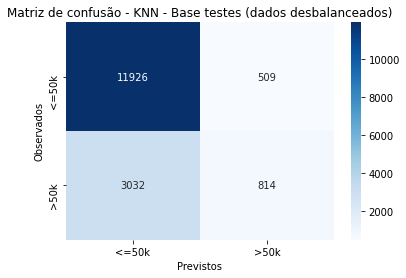

In [75]:
cf_matrix_knn = confusion_matrix(y_teste, y_hat)
ax = sn.heatmap(cf_matrix_knn, annot=True, cmap='Blues', fmt='g')

ax.set_title('Matriz de confusão - KNN - Base testes (dados desbalanceados)')
ax.set_xlabel('Previstos')
ax.set_ylabel('Observados')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['<=50k','>50k'])
ax.yaxis.set_ticklabels(['<=50k','>50k'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [76]:
print('Acuracia Teste:', accuracy_score(y_hat, y_teste))
print('Precisão Teste:', precision_score(y_hat, y_teste))
print('Revocacao Teste:', recall_score(y_hat, y_teste))
print('f1_score Teste:', f1_score(y_hat, y_teste))

Acuracia Teste: 0.7825072170014127
Precisão Teste: 0.21164846593863754
Revocacao Teste: 0.6152683295540439
f1_score Teste: 0.3149545366608628


## Para dados Desbalanceados

In [77]:
### Para dados balanceados

def undersample(df,column_name = 'y'):

    # capta o número de instâncias que cada classe vai passar a ter
    # no undersampling, pe
    n = df[column_name].value_counts().min()
      
    # cria um novo dataframe com as colunas do df original
    new_df = pd.DataFrame()
    
    for cat in df[column_name].unique():
        
        filtered_df = df[df[column_name] == cat]
            
        new_df = pd.concat([new_df, filtered_df.sample(n)])
        
    return new_df

In [78]:
knn_adult_train_balance = adult_train.copy()
knn_adult_test_balance = adult_test.copy()

In [79]:
## Balanceado dataset
knn_adult_train_balance = undersample(knn_adult_train_balance, 'income_higher_than_50k')

In [80]:
knn_adult_train_balance['income_higher_than_50k'].value_counts(normalize = True)

 >50K     0.5
 <=50K    0.5
Name: income_higher_than_50k, dtype: float64

In [81]:
# processando as colunas categoricas com o label encoder
for column in colunas_categoricas:
    knn_adult_train_balance[column] = LabelEncoder().fit_transform(knn_adult_train_balance[column])
    knn_adult_test_balance[column] = LabelEncoder().fit_transform(knn_adult_test_balance[column])


In [82]:
## determinando o valor de y que o se a pessoal tem um income > que 50k
## retirando o valor de y da base de treino
y = knn_adult_train_balance['income_higher_than_50k']
knn_adult_train_balance.drop(['income_higher_than_50k'], axis = 1, inplace = True)


## agora iremos alocar 30% do dados de treino para o houldout e 70% do dados de treino para base de treino
X_train, X_holdout, y_train, y_holdout = train_test_split(
    knn_adult_train_balance, y, test_size=0.3, random_state=17
)

In [83]:
knn_balance = KNeighborsClassifier(n_neighbors=5)


## para o knn precisamos de feature scaler devido ao calculo da distancias 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn_balance.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [84]:
from sklearn.metrics import accuracy_score
knn_pred = knn_balance.predict(X_holdout_scaled)
acuracia_knn = round(accuracy_score(y_holdout, knn_pred),2) * 100
print("A acuracia do modelo knn balanceado é ", acuracia_knn, '%')

A acuracia do modelo knn balanceado é  79.0 %


In [85]:
y_pred_bal = knn_balance.predict(X_holdout)

c:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [86]:
## paramétros de search
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 9}, 0.7981234051557813)

In [87]:
## modelo depois do gridsearch
knn_balance = KNeighborsClassifier(n_neighbors=9)

X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn_balance.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [88]:
y_pred_balance = knn_balance.predict(X_holdout_scaled)

In [89]:
print("Matriz de confusão do modelo nos dados de holdout:\n")
print(confusion_matrix(y_holdout, y_pred_balance))

print("\nMatriz de confusão do modelo nos dados de holdout:\n")
print(classification_report( y_holdout, y_pred_balance))

Matriz de confusão do modelo nos dados de holdout:

[[1847  513]
 [ 424 1921]]

Matriz de confusão do modelo nos dados de holdout:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2360
           1       0.79      0.82      0.80      2345

    accuracy                           0.80      4705
   macro avg       0.80      0.80      0.80      4705
weighted avg       0.80      0.80      0.80      4705



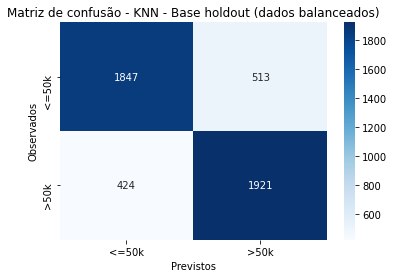

In [90]:
cf_matrix_knn = confusion_matrix(y_holdout, y_pred_balance)
ax = sn.heatmap(cf_matrix_knn, annot=True, cmap='Blues', fmt='g')

ax.set_title('Matriz de confusão - KNN - Base holdout (dados balanceados)')
ax.set_xlabel('Previstos')
ax.set_ylabel('Observados')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['<=50k','>50k'])
ax.yaxis.set_ticklabels(['<=50k','>50k'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Aplicando o modelo knn balanceado na base de testes

In [91]:
y_teste = knn_adult_test_balance['income_higher_than_50k']
knn_adult_test_balance.drop(['income_higher_than_50k'], axis = 1, inplace = True)
X_test = knn_adult_test_balance.copy()

In [92]:
y_hat_balance = knn_balance.predict(X_test)

c:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [93]:
print("Matriz de confusão do modelo na base de testes:\n")
print(confusion_matrix(y_teste, y_hat_balance))

print("\nMatriz de confusão do modelo nos na base de testes:\n")
print(classification_report( y_teste, y_hat_balance))

Matriz de confusão do modelo na base de testes:

[[11414  1021]
 [ 2654  1192]]

Matriz de confusão do modelo nos na base de testes:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     12435
           1       0.54      0.31      0.39      3846

    accuracy                           0.77     16281
   macro avg       0.67      0.61      0.63     16281
weighted avg       0.75      0.77      0.75     16281



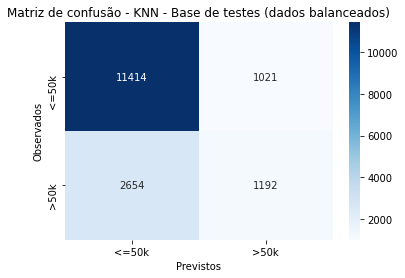

In [94]:
cf_matrix_knn = confusion_matrix(y_teste, y_hat_balance)
ax = sn.heatmap(cf_matrix_knn, annot=True, cmap='Blues', fmt='g')

ax.set_title('Matriz de confusão - KNN - Base de testes (dados balanceados)')
ax.set_xlabel('Previstos')
ax.set_ylabel('Observados')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['<=50k','>50k'])
ax.yaxis.set_ticklabels(['<=50k','>50k'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [95]:
print('Acuracia TESTE:', accuracy_score(y_hat_balance, y_teste))
print('Precisão TESTE:', precision_score(y_hat_balance, y_teste))
print('Revocacao TESTE:', recall_score(y_hat_balance, y_teste))
print('f1_score TESTE:', f1_score(y_hat_balance, y_teste))

Acuracia TESTE: 0.7742767643265156
Precisão TESTE: 0.30993239729589184
Revocacao TESTE: 0.5386353366470854
f1_score TESTE: 0.39346426803102824
